In [2]:
from src.gate_graph_loader import GateGraphLoader
import networkx as nx

graph_loader = GateGraphLoader('data/gate_pos.csv')

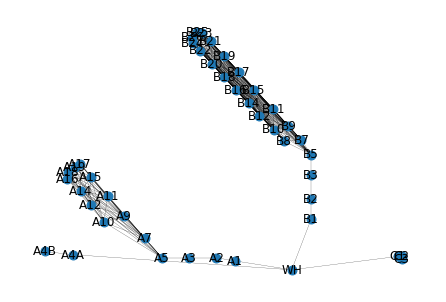

In [3]:
G = graph_loader.create_dense()
node_pos=nx.get_node_attributes(G,'pos')
nx.draw(G, node_pos, width=0.2, node_size=80, with_labels=True)

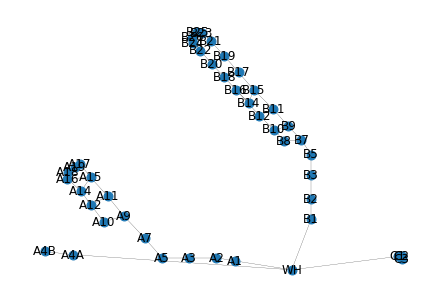

In [4]:
G = graph_loader.create_sparse()
node_pos=nx.get_node_attributes(G,'pos')
nx.draw(G, node_pos, width=0.2, node_size=80, with_labels=True)